# 딥러닝 입문

## [ 머신러닝 / 딥러닝의 한계]

### 1. 한계점

* 딥러닝에 따른 어떤 방법으로 학습을 진행하였는지 알 수 없음 => 명목적으로 믿을 수 없음
* 응용이 불가함 => 적용한 모델에서만 사용 가능

## [ 딥러닝 모델 구성 및 결과 검증 ]

### 1. mnist 데이터 확인 => 숫자 분석하기

In [2]:
# pip install tensorflow

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\jack0\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


* tensorflow에서 mnist 데이터

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

60000 60000 10000 10000


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train[0].shape

(28, 28)

* 정규화 => 0부터 1까지의 수로 변환
  * 1과 255의 숫자 차이가 커 과적합 방지를 위해 적용

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

* 결과를 그림으로

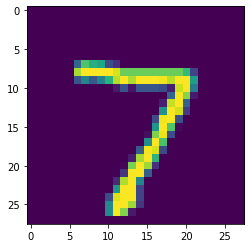

In [9]:
plt.imshow(x_test[0])

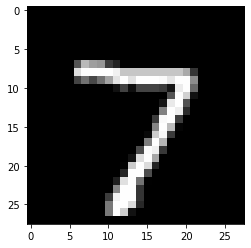

In [10]:
plt.imshow(x_test[0], cmap='gray')

In [11]:
y_test[0]

7

### 2. 모델 작성

* 입력 데이터 / 히든 layer / 데이터 일부 버리기 / 출력층 정보 
* 모델 학습 방법 명시

In [12]:
# tf.keras.layers.Flatten(input_shape=(28, 28)) : input 데이터를 어떻게 받을 것인가
# tf.keras.layers.Dense(128, activation='relu') : hidden Layer에 128개 원이 생김, 활성화 함수(activation)
# tf.keras.layers.Dropout(0.2) : 데이터의 20%를 버려 더 정확한 모델 만들기
# tf.keras.layers.Dense(10, activation='softmax') : 10가지의 결과, 활성화 함수

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 학습 방법
# optimizer : 모델을 빨리 하기 위한 함수
# loss : 실제값과 예측값의 차이인 loss 계산 방법(단순 빼기, 제곱 ..) 설정
# metrics : 모델의 목표
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* 모델 시각화
  * keras에는 summary로 시각화 가능
  * Tree 구조에서는 graphviz로 가능

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


* 모델 학습 및 평가

In [15]:
# epochs : 몇 번을 반복해서 학습할 것인가
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0636 - accuracy: 0.9796
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0559 - accuracy: 0.9821
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0521 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0469 - accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9852


In [16]:
# verbose : 출력의 형태(0, 1, 2)

model.evaluate(x_test,  y_test, verbose = 2)

313/313 - 1s - loss: 0.0675 - accuracy: 0.9816 - 1s/epoch - 4ms/step


[0.06751516461372375, 0.9815999865531921]